# Setting up the scattering medium

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('whitegrid')

import sys
sys.path.insert(1, '../')
from src.core import scatterer

## Random scattering medium example

In [2]:
wavelength = 632.8E-3
scattering_degree = 2
g_percent = [1.0]
bounds = np.array([[-5, 5], [-5, 5], [-0.5, 0.5]])
surround_index = 1.33
radius = 0.06969697
size_param = 2 * np.pi * radius * surround_index / wavelength
print(f'size param: {size_param}')
structure = 'random'
particle_index = 2.488  # polystyrene in water

# initialize scattering medium
scat_medium = scatterer.RandomScatteringMedium(bounds=bounds,
                                               particle_radii=radius,
                                               size_param=size_param,
                                               scattering_degree=scattering_degree,
                                               particle_index=particle_index,
                                               env_index=surround_index,
                                               no_overlaps=False)

size param: 0.9204049313406849
{'bounds': array([[-5. ,  5. ],
       [-5. ,  5. ],
       [-0.5,  0.5]]), 'depth': 1.0, 'width': 10.0, 'height': 10.0, 'volume': 100.0, 'structure': 'random', 'particle_radii': array([0.06969697, 0.06969697, 0.06969697, ..., 0.06969697, 0.06969697,
       0.06969697]), 'particle_index': 2.488, 'particle_size_param': 0.9204049313406849, 'size_param': 0.9204049313406849, 'thetarange': array([-180.        , -179.63963964, -179.27927928, -178.91891892,
       -178.55855856, -178.1981982 , -177.83783784, -177.47747748,
       -177.11711712, -176.75675676, -176.3963964 , -176.03603604,
       -175.67567568, -175.31531532, -174.95495495, -174.59459459,
       -174.23423423, -173.87387387, -173.51351351, -173.15315315,
       -172.79279279, -172.43243243, -172.07207207, -171.71171171,
       -171.35135135, -170.99099099, -170.63063063, -170.27027027,
       -169.90990991, -169.54954955, -169.18918919, -168.82882883,
       -168.46846847, -168.10810811, -167.747

In [3]:
xs, ys, zs = scat_medium.particle_centers

Text(0.5, 0, 'z')

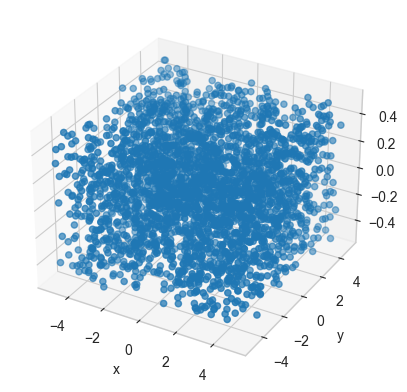

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
ax.set_zlabel(r'z')

## Lattice scattering medium example

For cuboid geometries,
\begin{equation}
    \rho_\text{particles} = \frac{N_\text{particles}}{V_\text{medium}}, \quad
    V_\text{ccell} = a_1 \times a_2 \times a_3, \quad
    N_\text{particles per ccell} = 1. 
\end{equation}
The number of conventional cells $N_\text{ccell}$ in the medium defined by bounds along x, y, and z is given by 
\begin{equation}
    N_\text{ccell} = \frac{V_\text{medium}}{V_\text{ccell}}
\end{equation}
and the total number of lattice points in the medium is given by 
\begin{equation}
    N_\text{particles} = N_\text{ccell} \times N_\text{particles per ccell}.
\end{equation}
We want to generate the lattice constants $a_1, a_2, a_3$ given the density per unit volume in microns, the volume of the medium, and the number of particles per conventional cell. 
\begin{equation}
    \rho_\text{particles} = \frac{N_\text{particles}}{V_\text{medium}} \\
    \rho_\text{particles} V_\text{medium} = N_\text{particles} \\
    \rho_\text{particles} V_\text{medium} = N_\text{ccell} \times N_\text{particles per ccell} \\
    \rho_\text{particles} V_\text{medium} = \frac{V_\text{medium}}{V_\text{ccell}} \times N_\text{particles per ccell} \\
    \rho_\text{particles} = \frac{N_\text{particles per ccell}}{V_\text{ccell}} =  \frac{N_\text{particles per ccell}}{a_1 a_2 a_3}\\
    a_1 a_2 a_3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}} = \frac{N_\text{particles per ccell}}{N_\text{particles}} V_\text{medium}.
\end{equation}
This is the equation for the lattice constants for an orthorhombic lattice, where $a_1 \neq a_2 \neq a_3.$
For a simple cubic lattice, $a_1 = a_2 = a_3 = a$, so 
\begin{equation}
    a^3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}}.
\end{equation}
For a tetragonal lattice, $a_1 = a_2 \neq a_3 $, so
\begin{equation}
    a_1^2a_3 = \frac{N_\text{particles per ccell}}{\rho_\text{particles}}.
\end{equation}

The choice for $a_1, a_2, a_3$ is limited only by the geometry of the lattice and the particle radii $r_1, r_2$ (assuming there are two alternating atoms) where
\begin{equation}
    a_i \geq r_1 + r_2 \quad \text{for } i = 1, 2, 3. 
\end{equation}

In [5]:
# set scattering medium parameters
wavelength = 632.8E-3
scattering_degree = 2
g_percent = [1.0]
surround_index = 1.33
radius = 0.06969697
size_param = 2 * np.pi * radius * surround_index / wavelength
particle_index = 2.488  # polystyrene in water


glist = [0.1]
g_tag = int(glist[0] * 10)
g_percent = [1.0]
bounds = np.array([[-5, 5], [-5, 5], [-1, 1]])
structure = 'cubic'
a1 = 1
N = 10
# d_s = 1 / (particle density * scattering cross section) where
# the scattering cross section of a hard sphere is pi radius**2

### Simple Cubic

In [6]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)
sc = scatterer.LatticeScatteringMedium(
    bounds=bounds, 
    lattice_constants=lattice_constants, 
    space_structure=structure, 
    particle_radii=radius, 
    size_param=size_param,
    particle_index=particle_index,
    env_index=surround_index,
)

{'bounds': array([[-5,  5],
       [-5,  5],
       [-1,  1]]), 'depth': 2, 'width': 10, 'height': 10, 'volume': 200, 'structure': 'lattice', 'particle_radii': array(0.06969697), 'particle_index': 2.488, 'particle_size_param': 0.9204049313406849, 'size_param': 0.9204049313406849, 'thetarange': array([-180.        , -179.63963964, -179.27927928, -178.91891892,
       -178.55855856, -178.1981982 , -177.83783784, -177.47747748,
       -177.11711712, -176.75675676, -176.3963964 , -176.03603604,
       -175.67567568, -175.31531532, -174.95495495, -174.59459459,
       -174.23423423, -173.87387387, -173.51351351, -173.15315315,
       -172.79279279, -172.43243243, -172.07207207, -171.71171171,
       -171.35135135, -170.99099099, -170.63063063, -170.27027027,
       -169.90990991, -169.54954955, -169.18918919, -168.82882883,
       -168.46846847, -168.10810811, -167.74774775, -167.38738739,
       -167.02702703, -166.66666667, -166.30630631, -165.94594595,
       -165.58558559, -165.22522523

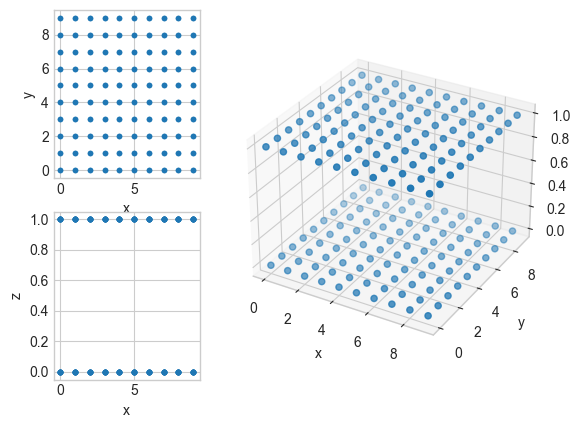

In [7]:
sc.plot(sc.ravel_ijk(sc.space_lattice))

/Users/hannaharjonillo/.pyenv/versions/3.8.13/envs/gbpmc-env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


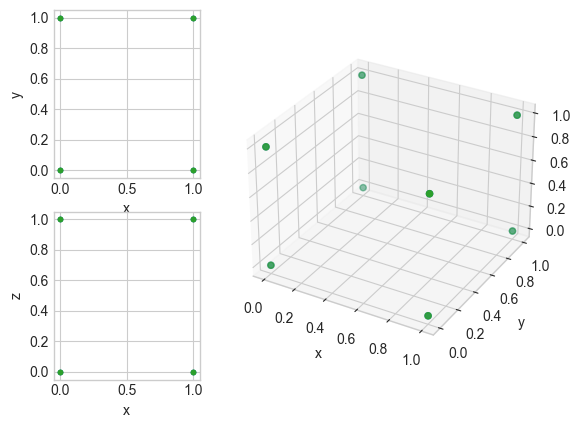

In [8]:
space_cell, basis_cell = sc.get_conventional_cell()
sc.plot(space_cell.T, basis_cell.T)

### Body-centered cubic

In [9]:
# basis = np.ones(shape=(3,)) / 2
basis = np.ones(shape=(3, 3)) * np.nan
basis[0, 0] = 1/2
basis[1, 1] = 1/2
basis[2, 2] = 1/2
basis

array([[0.5, nan, nan],
       [nan, 0.5, nan],
       [nan, nan, 0.5]])

In [10]:
1 + basis

array([[1.5, nan, nan],
       [nan, 1.5, nan],
       [nan, nan, 1.5]])

In [11]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)

bcc = scatterer.LatticeScatteringMedium(
    bounds=bounds, 
    lattice_constants=lattice_constants, 
    space_structure=structure, 
    basis_structure=basis,
    particle_radii=radius, 
    size_param=size_param,
    particle_index=particle_index,
    env_index=surround_index,
)

{'bounds': array([[-5,  5],
       [-5,  5],
       [-1,  1]]), 'depth': 2, 'width': 10, 'height': 10, 'volume': 200, 'structure': 'lattice', 'particle_radii': array(0.06969697), 'particle_index': 2.488, 'particle_size_param': 0.9204049313406849, 'size_param': 0.9204049313406849, 'thetarange': array([-180.        , -179.63963964, -179.27927928, -178.91891892,
       -178.55855856, -178.1981982 , -177.83783784, -177.47747748,
       -177.11711712, -176.75675676, -176.3963964 , -176.03603604,
       -175.67567568, -175.31531532, -174.95495495, -174.59459459,
       -174.23423423, -173.87387387, -173.51351351, -173.15315315,
       -172.79279279, -172.43243243, -172.07207207, -171.71171171,
       -171.35135135, -170.99099099, -170.63063063, -170.27027027,
       -169.90990991, -169.54954955, -169.18918919, -168.82882883,
       -168.46846847, -168.10810811, -167.74774775, -167.38738739,
       -167.02702703, -166.66666667, -166.30630631, -165.94594595,
       -165.58558559, -165.22522523

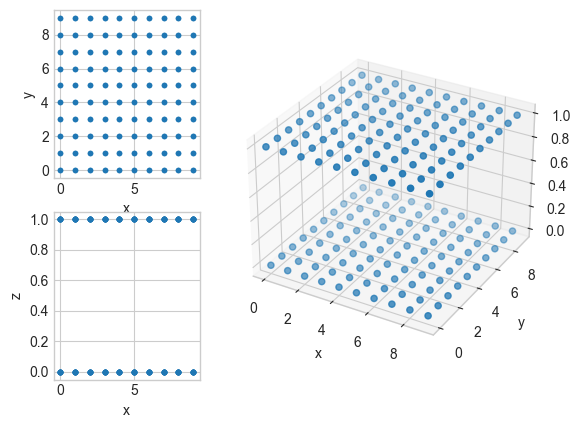

In [12]:
bcc.plot(bcc.ravel_ijk(bcc.space_lattice), bcc.basis_lattice)

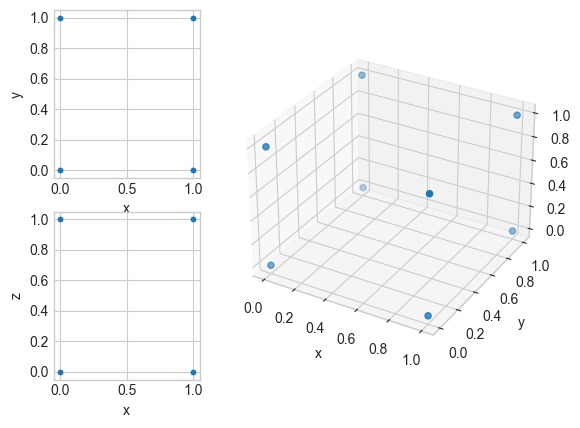

In [13]:
space_cell_bcc, basis_cell_bcc = bcc.get_conventional_cell()
bcc.plot(space_cell_bcc.T, basis_cell_bcc.T)

### Face-centered cubic

Still TODO: for fcc, the center is being left on the lattice. likely a problem with LatticeScatteringMedium handing 3x3 basis_structure input

In [14]:
basis = np.zeros(shape=(3, 3))
basis[0] = 0, 1/2, 1/2
basis[1] = 1/2, 0, 1/2
basis[2] = 1/2, 1/2, 0 
basis

array([[0. , 0.5, 0.5],
       [0.5, 0. , 0.5],
       [0.5, 0.5, 0. ]])

In [15]:
# initialize scattering medium with lattice constants
lattice_constants = (a1, a1, a1)
fcc = scatterer.LatticeScatteringMedium(
    bounds=bounds, 
    lattice_constants=lattice_constants, 
    space_structure=structure,
    basis_structure=basis,
    particle_radii=radius, 
    size_param=size_param,
    particle_index=particle_index,
    env_index=surround_index,
)

{'bounds': array([[-5,  5],
       [-5,  5],
       [-1,  1]]), 'depth': 2, 'width': 10, 'height': 10, 'volume': 200, 'structure': 'lattice', 'particle_radii': array(0.06969697), 'particle_index': 2.488, 'particle_size_param': 0.9204049313406849, 'size_param': 0.9204049313406849, 'thetarange': array([-180.        , -179.63963964, -179.27927928, -178.91891892,
       -178.55855856, -178.1981982 , -177.83783784, -177.47747748,
       -177.11711712, -176.75675676, -176.3963964 , -176.03603604,
       -175.67567568, -175.31531532, -174.95495495, -174.59459459,
       -174.23423423, -173.87387387, -173.51351351, -173.15315315,
       -172.79279279, -172.43243243, -172.07207207, -171.71171171,
       -171.35135135, -170.99099099, -170.63063063, -170.27027027,
       -169.90990991, -169.54954955, -169.18918919, -168.82882883,
       -168.46846847, -168.10810811, -167.74774775, -167.38738739,
       -167.02702703, -166.66666667, -166.30630631, -165.94594595,
       -165.58558559, -165.22522523

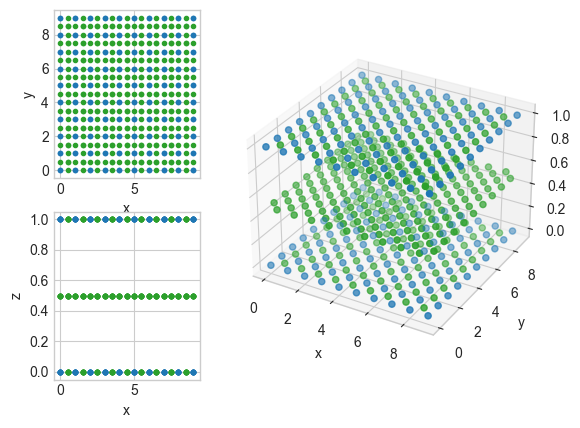

In [16]:
fcc.plot(fcc.ravel_ijk(fcc.space_lattice), fcc.basis_lattice)

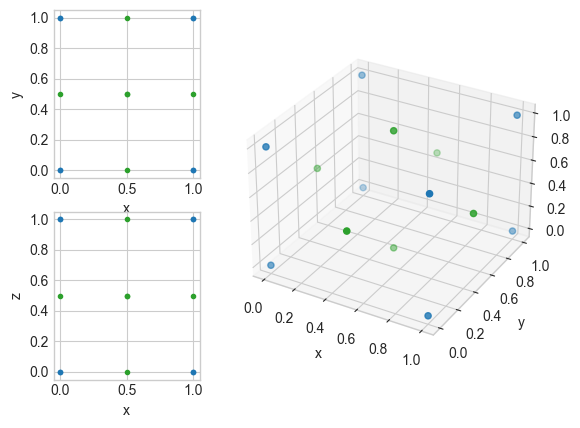

In [17]:
space_cell_fcc, basis_cell_fcc = fcc.get_conventional_cell()
bcc.plot(space_cell_fcc.T, basis_cell_fcc.T)